In [1]:
# Attention Mechanism
# Markov Chain

In [2]:
# ATTENTION MECHANISM
# Focussing on different parts of image which have more impact 
# Soft: applies weight to each unit based on importance probabilistic
# Hard: applies a weight to the most important unit
# n . nxn = alpha 

In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import torch 
import torch.nn.functional as F
import torch.nn as nn
import matplotlib.pyplot as plt
params = {"ytick.color" : "w",
          "xtick.color" : "w",
          "axes.labelcolor" : "w",
          "axes.edgecolor" : "w"}
plt.rcParams.update(params)

In [30]:
def generate_data(N, dim=32, attention_col=5):
    x = np.random.standard_normal(size=(N,dim))
    y = np.random.randint(low=0, high=3, size=(N,1))
    x[:,attention_col] = y[:,0]
    return x,y

In [31]:
class Net(nn.Module):
    def __init__(self, ndim=32):
        super(Net, self).__init__()
        self.attention = nn.Linear(ndim, ndim)
        self.out = nn.Linear(ndim, 1)
    
    def attn(self, x):
        p = F.softmax(self.attention(x))
        return p
        
    def forward(self, x):
        x = x * self.attn(x)
        x = self.attn(x)
        x = self.out(x)
        return x

In [32]:
model = Net()
X, y = generate_data(100)
X.shape, y.shape

((100, 32), (100, 1))

In [33]:
print X[0], y[0]

[ 0.43687887 -0.31074266 -0.88509546  0.03125521 -2.1938443   2.
  0.49723028 -1.25313012  0.08738764  0.96414974  0.47717999  1.41427682
 -2.11488397 -0.36309104  0.28398857  1.34050642 -0.61208105  0.32784581
 -0.83933752 -0.65834654 -0.20438137  0.88477221  0.24083225 -0.15834825
 -0.47173549  0.48772103  0.87653485  0.31135709  0.63213505 -0.21228708
 -0.98043179 -0.73371745] [2]


In [34]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
lossfn = torch.nn.MSELoss()

In [36]:
for epoch in range(100):
    pred = model(torch.FloatTensor(X))
    #print pred.shape
    loss = lossfn(pred, torch.FloatTensor(y))
    optimizer.zero_grad()
    
    loss.backward()
    optimizer.step()
    
    if epoch % 10 == 0:
        print epoch, loss

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:8: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  


0 tensor(1.0281)
10 tensor(1.0023)
20 tensor(0.9773)
30 tensor(0.9531)
40 tensor(0.9298)
50 tensor(0.9072)
60 tensor(0.8854)
70 tensor(0.8645)
80 tensor(0.8443)
90 tensor(0.8249)


In [37]:
o = model(torch.FloatTensor(X))
a = model.attn(torch.FloatTensor(X))
print a.shape
print a[0]

torch.Size([100, 32])
tensor([ 0.0009,  0.0066,  0.0012,  0.0013,  0.7549,  0.0108,  0.0029,
         0.0229,  0.0007,  0.0007,  0.0006,  0.0189,  0.0008,  0.0004,
         0.0136,  0.0019,  0.0042,  0.0246,  0.0055,  0.0042,  0.0147,
         0.0022,  0.0005,  0.0004,  0.0189,  0.0029,  0.0013,  0.0181,
         0.0010,  0.0079,  0.0510,  0.0034])


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:8: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  


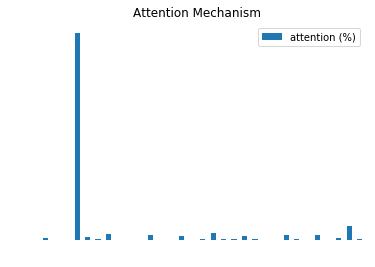

In [40]:
ds = pd.DataFrame(a.data.numpy()[0], columns=['attention (%)'])
ds.plot(kind='bar', title='Attention Mechanism')
plt.show()